In [ ]:
!pip install biosignalsnotebooks
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import pywt
from scipy import signal
# biosignalsnotebooks python package
import biosignalsnotebooks as bsnb

#LEER TODAS LAS SEÑALES Y CONVERTIR SUS VALORES



Text(0, 0.5, 'Voltaje (mV)')

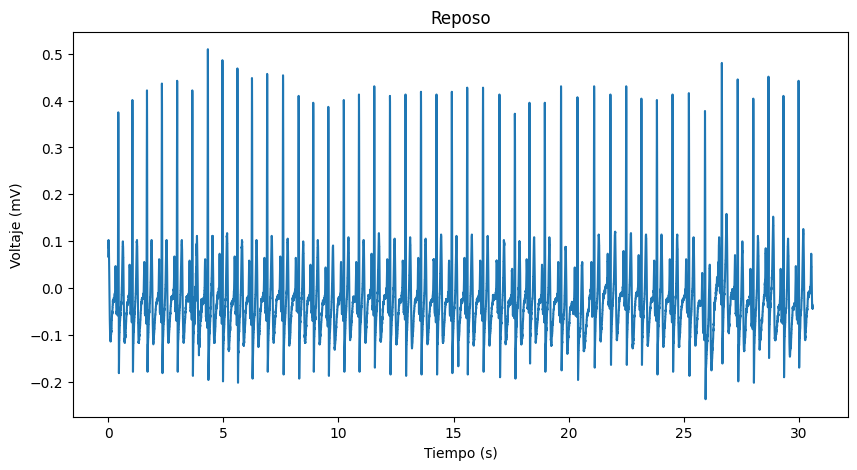

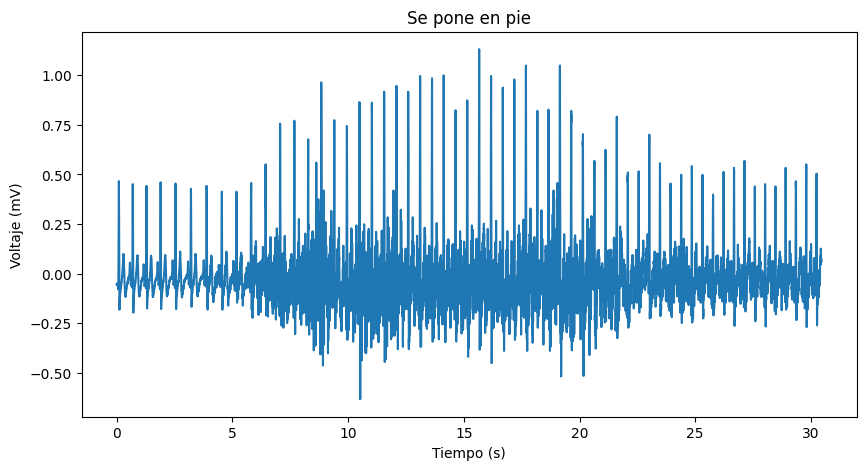

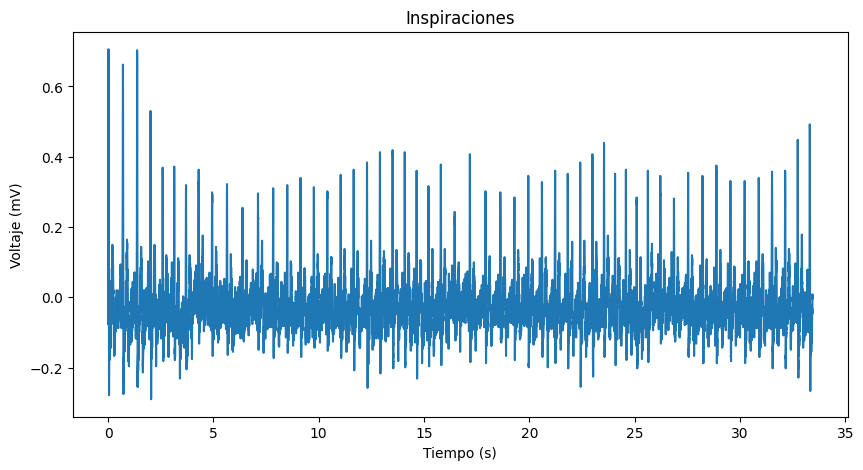

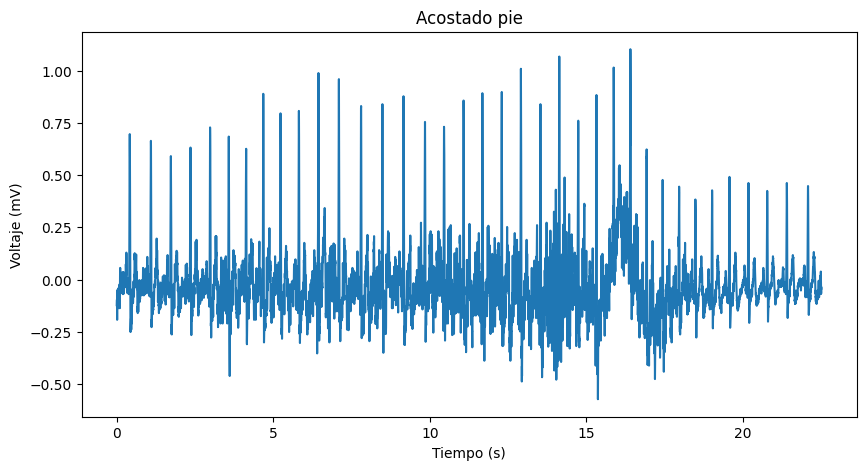

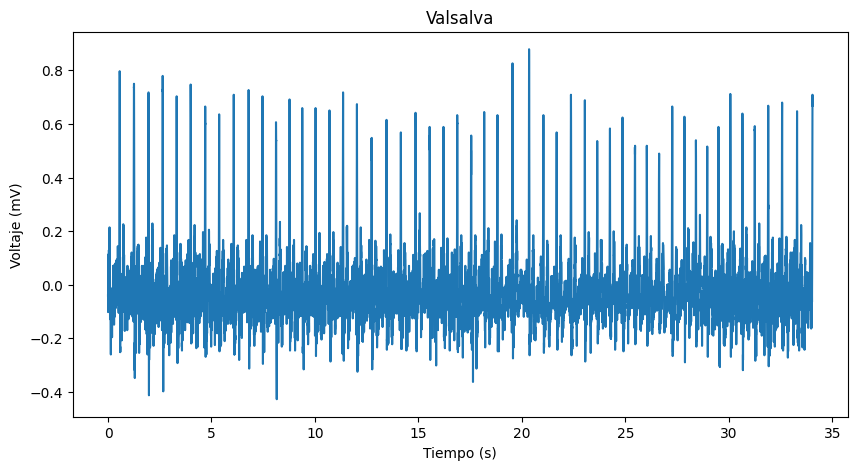

In [ ]:
#Primero leemos todos los archivos txt
array_reposo = np.genfromtxt("Reposo.txt",delimiter="	",skip_header = 2)
array_sepone_pie=np.genfromtxt("Mientras se levanta.txt",delimiter="	",skip_header = 2)
array_inspiraciones=np.genfromtxt("Inspiraciones.txt",delimiter="	",skip_header = 2)
array_acostado_pie=np.genfromtxt("Pie acostado.txt",delimiter="	",skip_header = 2)
array_valsalva=np.genfromtxt("Valsalva.txt",delimiter="	",skip_header = 2)

#Guardamos los valores de cada caso a un tipo de array
valores_reposo=array_reposo[:,-2]
valores_sepone_pie=array_sepone_pie[:,-2]
valores_inspiraciones=array_inspiraciones[:,-2]
valores_acostado_pie=array_acostado_pie[:,-2]
valores_valsalva=array_valsalva[:,-2]

#Determinamos la longitud de cada arreglo
cantidad_reposo=np.size(valores_reposo);
cantidad_sepone_pie=np.size(valores_sepone_pie);
cantidad_inspiraciones=np.size(valores_inspiraciones);
cantidad_acostado_pie=np.size(valores_acostado_pie);
cantidad_valsalva=np.size(valores_valsalva);

#Creamos los vectores de tiempo para cada caso
tiempo_reposo=np.arange(0,cantidad_reposo)
tiempo_reposo=tiempo_reposo/1000

tiempo_sepone_pie=np.arange(0,cantidad_sepone_pie)
tiempo_sepone_pie=tiempo_sepone_pie/1000

tiempo_inspiraciones=np.arange(0,cantidad_inspiraciones)
tiempo_inspiraciones=tiempo_inspiraciones/1000

tiempo_acostado_pie=np.arange(0,cantidad_acostado_pie)
tiempo_acostado_pie=tiempo_acostado_pie/1000

tiempo_valsalva=np.arange(0,cantidad_valsalva)
tiempo_valsalva=tiempo_valsalva/1000


#Convertimos los valores ADC a voltaje (mV)
valores_reposo=(((valores_reposo/1024)-0.5)*3.3)/(1100)
valores_reposo=valores_reposo*1000

valores_sepone_pie=(((valores_sepone_pie/1024)-0.5)*3.3)/(1100)
valores_sepone_pie=valores_sepone_pie*1000

valores_inspiraciones=(((valores_inspiraciones/1024)-0.5)*3.3)/(1100)
valores_inspiraciones=valores_inspiraciones*1000

valores_acostado_pie=(((valores_acostado_pie/1024)-0.5)*3.3)/(1100)
valores_acostado_pie=valores_acostado_pie*1000

valores_valsalva=(((valores_valsalva/1024)-0.5)*3.3)/(1100)
valores_valsalva=valores_valsalva*1000

#MOSTRAR SENALES
plt.figure(figsize=(10,5))
plt.plot(tiempo_reposo,valores_reposo)
plt.title("Reposo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (mV)")


plt.figure(figsize=(10,5))
plt.plot(tiempo_sepone_pie,valores_sepone_pie)
plt.title("Se pone en pie")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (mV)")


plt.figure(figsize=(10,5))
plt.plot(tiempo_inspiraciones,valores_inspiraciones)
plt.title("Inspiraciones")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (mV)")


plt.figure(figsize=(10,5))
plt.plot(tiempo_acostado_pie,valores_acostado_pie)
plt.title("Acostado pie")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (mV)")


plt.figure(figsize=(10,5))
plt.plot(tiempo_valsalva,valores_valsalva)
plt.title("Valsalva")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (mV)")





#VENTANEADO


In [ ]:

#PARA SENAL ACOSTADO PIE
valores_acostado_pie_ventana=valores_acostado_pie[20000:24000]

#PARA SENAL DE VALSALVA
mitad=len(valores_valsalva)/2
mitad=int(mitad)
valores_valsalva_ventana1=valores_valsalva[:mitad]
valores_valsalva_ventana2=valores_valsalva[mitad:]



#DISEÑO DE FILTROS

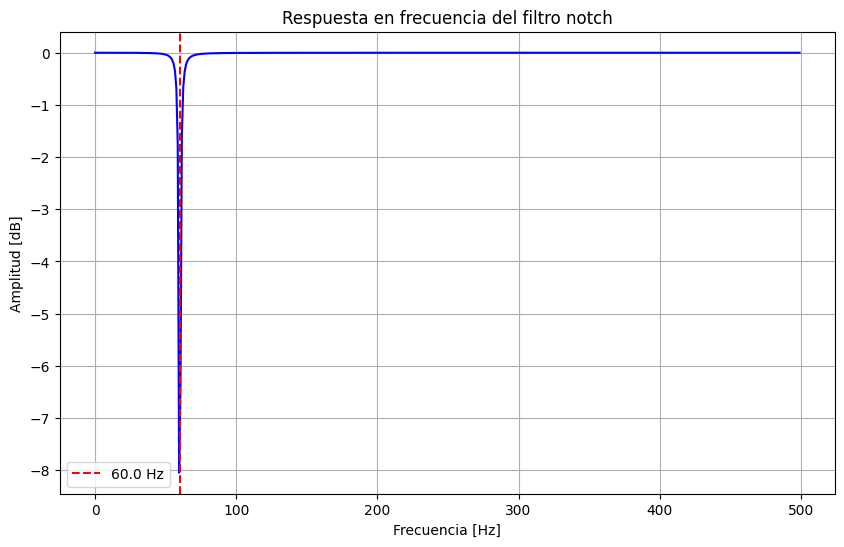

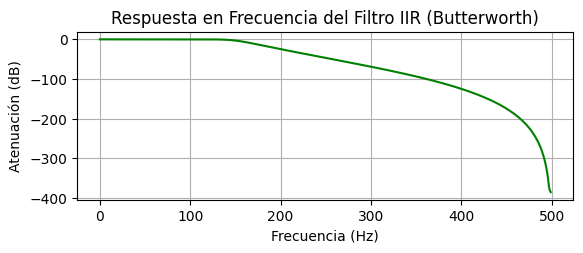

In [ ]:
#FILTRADO NOTCH
# Parámetros del filtro notch
fs = 1000  # Frecuencia de muestreo (Hz)
f0 = 60.0  # Frecuencia a eliminar (Hz)
Q = 30.0   # Factor de calidad

# Diseñar el filtro notch
b_notch, a_notch = signal.iirnotch(f0, Q, fs)

w, h = signal.freqz(b_notch, a_notch, fs=fs)

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.title('Respuesta en frecuencia del filtro notch')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.grid()
plt.axvline(f0, color='r', linestyle='--', label=f'{f0} Hz')
plt.legend()
plt.show()
#FILTRO PASABAJO
fc = 150.0  # Frecuencia de corte (Hz)
Fs=1000
# Diseñar el filtro Butterworth pasabajo
Wn_irr= 0.3 #0.3 indica que la frecuencia de corte es 150 Hz
iir_filter = signal.iirfilter(N=8, Wn=Wn_irr, btype='low', ftype='butter')
# Respuesta en frecuencia del filtro IIR (Butterworth)

w, h = signal.freqz(*signal.butter(8, Wn_irr, btype='low'))
mag_iir = np.abs(h)  # Magnitud de la respuesta del filtro IIR
mag_db_iir = 20 * np.log10(mag_iir)  # Convertir magnitud a dB

plt.subplot(2, 1, 2)
plt.plot(0.5*Fs*w/np.pi, mag_db_iir, 'g')  # Graficar la respuesta en frecuencia en dB
plt.title('Respuesta en Frecuencia del Filtro IIR (Butterworth)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Atenuación (dB)')  # Etiqueta del eje y en dB
plt.grid(True)



#PREPROCESAMIENTO DE LA SENAL FILTROS

In [ ]:
#FILTRAMOS SEÑAL
#SEÑAL EN REPOSO
#Aplicar filtropasabajo
iir_ecg = signal.lfilter(iir_filter[0], iir_filter[1], valores_reposo)
#Aplicar filtro notch
ecg_reposo_notch = signal.filtfilt(b_notch, a_notch, iir_ecg)

#SEÑAL EN INSPIRACIONES
#Aplicar filtropasabajo
iir_ecg = signal.lfilter(iir_filter[0], iir_filter[1], valores_inspiraciones)
#Aplicar filtro notch
ecg_inspiraciones_notch = signal.filtfilt(b_notch, a_notch, iir_ecg)

#SEÑAL EN ACOSTADO_PIE
#Aplicar filtropasabajo
iir_ecg = signal.lfilter(iir_filter[0], iir_filter[1], valores_acostado_pie_ventana)
#Aplicar filtro notch
ecg_acostado_pie_notch = signal.filtfilt(b_notch, a_notch, iir_ecg)


#SEÑAL EN VALSALVA 1
#Aplicar filtropasabajo
iir_ecg = signal.lfilter(iir_filter[0], iir_filter[1], valores_valsalva_ventana1)
#Aplicar filtro notch
ecg_valsalva1_notch = signal.filtfilt(b_notch, a_notch, iir_ecg)

#SEÑAL EN VALSALVA 2
#Aplicar filtropasabajo
iir_ecg = signal.lfilter(iir_filter[0], iir_filter[1], valores_valsalva_ventana2)
#Aplicar filtro notch
ecg_valsalva2_notch = signal.filtfilt(b_notch, a_notch, iir_ecg)


#FILTRADO DE LA SEÑAL

[ 0.00189416  0.00212992  0.00237622 ... -0.01293458 -0.01347793
 -0.01403984]


Text(0, 0.5, 'Voltaje (mV)')

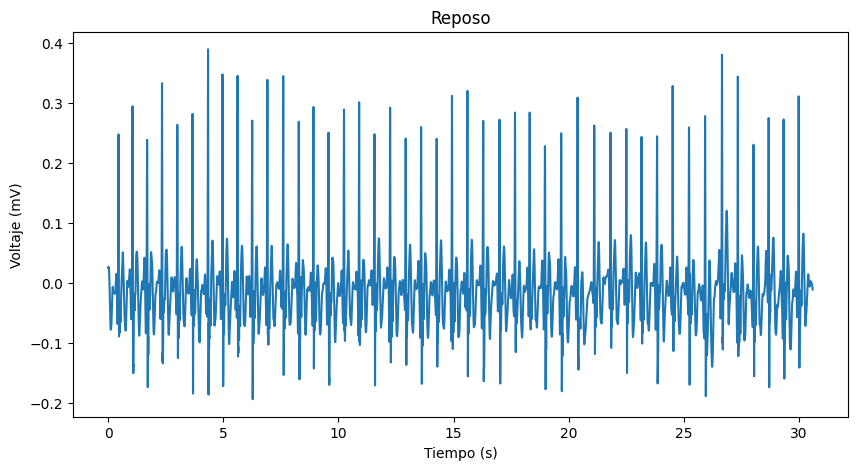

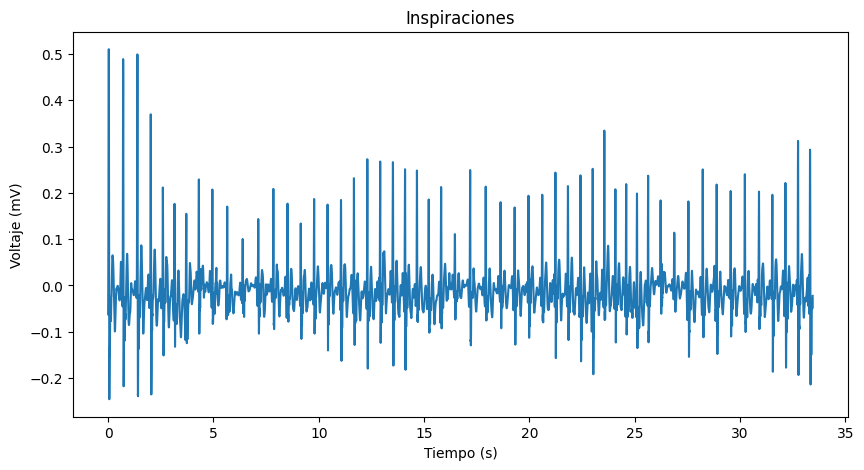

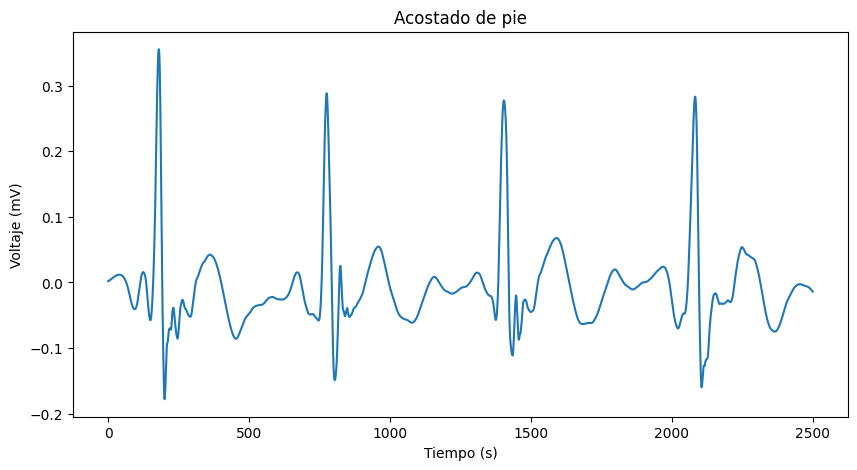

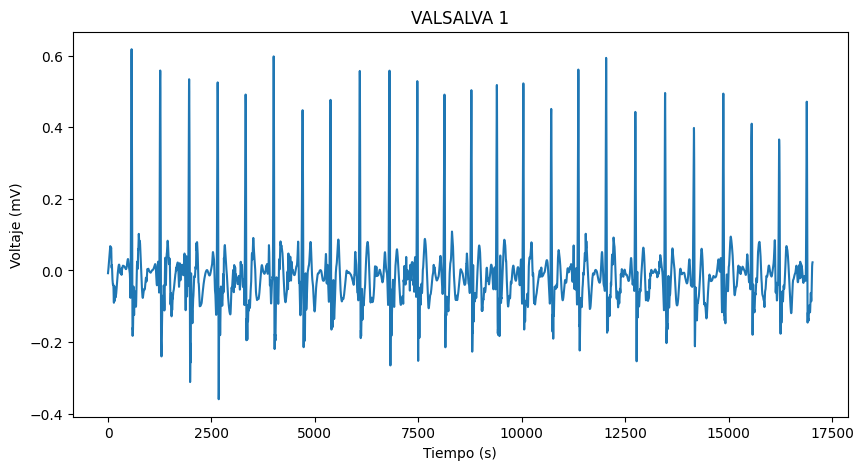

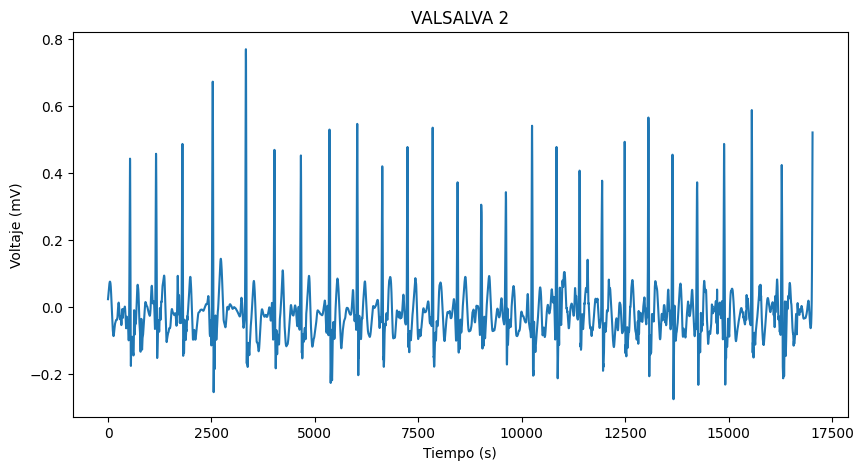

In [ ]:

#FILTRAMOS CADA SEÑAL

#REPOSO
coeffs = pywt.wavedec(ecg_reposo_notch, 'db6', level=6)

umbral = 0.22
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

ecg_reposo_filtrado = pywt.waverec(coeffs_umbral, 'db6')

plt.figure(figsize=(10,5))
plt.plot(tiempo_reposo,ecg_reposo_filtrado)
plt.title("Reposo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (mV)")

#INSPIRACIONES
coeffs = pywt.wavedec(ecg_inspiraciones_notch, 'db6', level=6)

umbral = 0.22
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

ecg_inspiraciones_filtrado = pywt.waverec(coeffs_umbral, 'db6')

plt.figure(figsize=(10,5))
plt.plot(tiempo_inspiraciones,ecg_inspiraciones_filtrado)
plt.title("Inspiraciones")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (mV)")
#ACOSTADO PIE
coeffs = pywt.wavedec(ecg_acostado_pie_notch, 'db6', level=6)

umbral = 0.22
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

ecg_acostado_pie_filtrado = pywt.waverec(coeffs_umbral, 'db6')
print(ecg_acostado_pie_filtrado)
plt.figure(figsize=(10,5))
plt.plot(ecg_acostado_pie_filtrado)
plt.title("Acostado de pie")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (mV)")
#VALSALVA
#--VENTANA 1
coeffs = pywt.wavedec(ecg_valsalva1_notch, 'db6', level=6)

umbral = 0.22
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

ecg_valsalva_ventana1_filtrado = pywt.waverec(coeffs_umbral, 'db6')

plt.figure(figsize=(10,5))
plt.plot(ecg_valsalva_ventana1_filtrado)
plt.title("VALSALVA 1")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (mV)")
#--VENTANA 2
coeffs = pywt.wavedec(ecg_valsalva2_notch, 'db6', level=6)

umbral = 0.22
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

ecg_valsalva_ventana2_filtrado = pywt.waverec(coeffs_umbral, 'db6')

plt.figure(figsize=(10,5))
plt.plot(ecg_valsalva_ventana2_filtrado)
plt.title("VALSALVA 2")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (mV)")

#EXTRACCION DE CARACTERISTICAS

22.229249534874562
[98.52216749 94.93670886 92.59259259 90.36144578 90.63444109 89.15304606
 95.54140127 91.88361409 94.19152276 91.04704097 87.20930233 88.88888889
 94.33962264 91.46341463 89.15304606 91.32420091 90.09009009 88.365243
 88.75739645 89.55223881 88.75739645 90.22556391 89.55223881 87.33624454
 84.62623413 89.41877794 94.04388715 90.49773756 85.10638298 84.26966292
 82.87292818 84.74576271 87.59124088 90.90909091 88.75739645 88.75739645
 84.50704225 85.83690987 81.74386921 87.08272859 88.365243   91.18541033
 92.44992296 91.60305344]
202.59789479840154
[ 87.97653959  88.62629247  94.78672986  53.14437555  51.94805195
  93.60374415  85.10638298  81.63265306  81.19079838  83.68200837
  89.28571429  95.54140127  94.33962264  94.04388715  94.19152276
  97.56097561  94.48818898  98.19967267  99.17355372  52.63157895
  52.26480836  91.88361409  82.75862069  81.30081301  85.10638298
  89.68609865  91.18541033  91.74311927  96.15384615  50.46257359
  52.95675199  57.74783446  57.

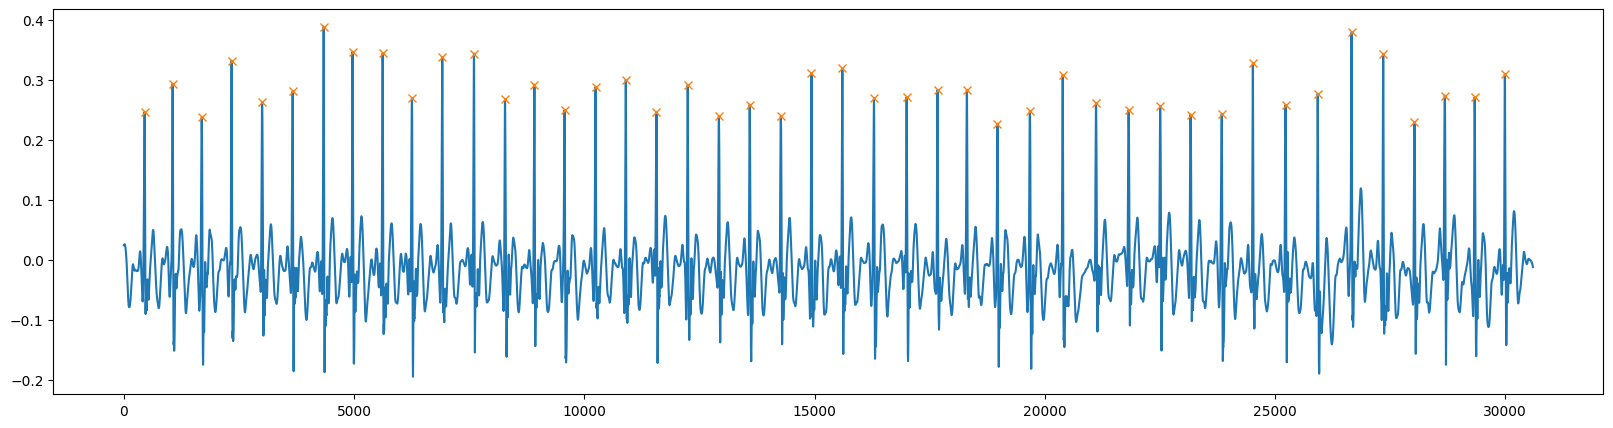

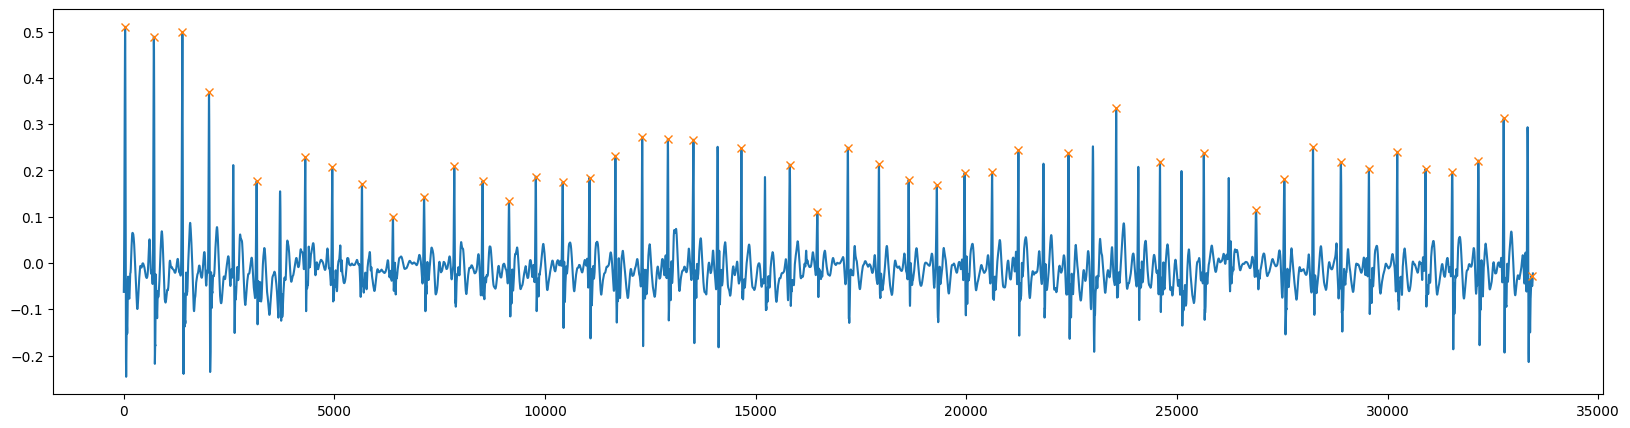

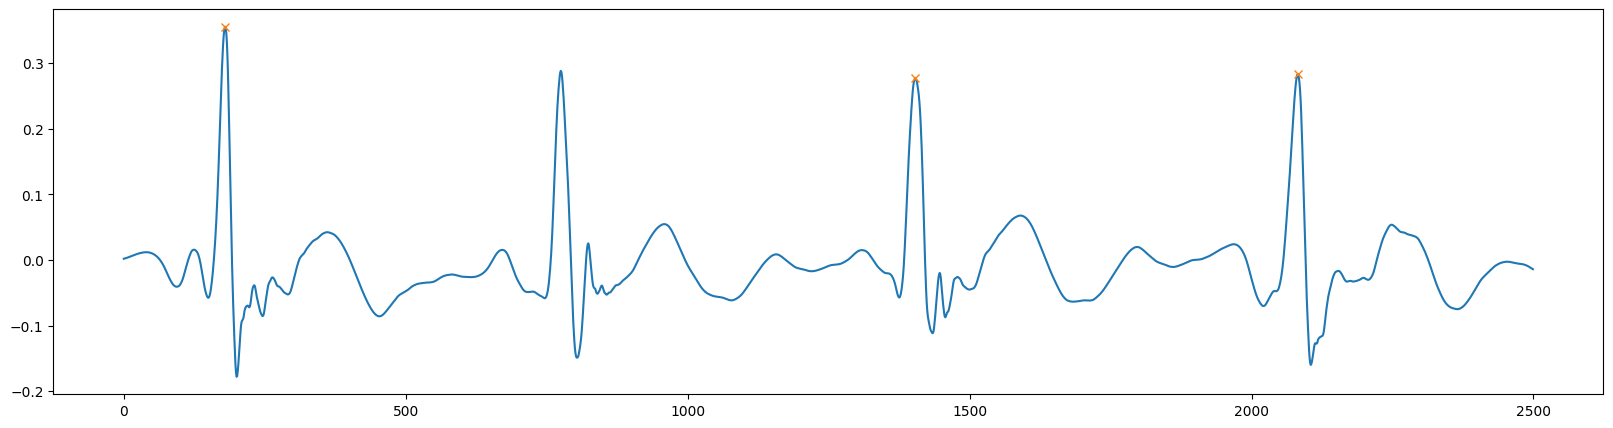

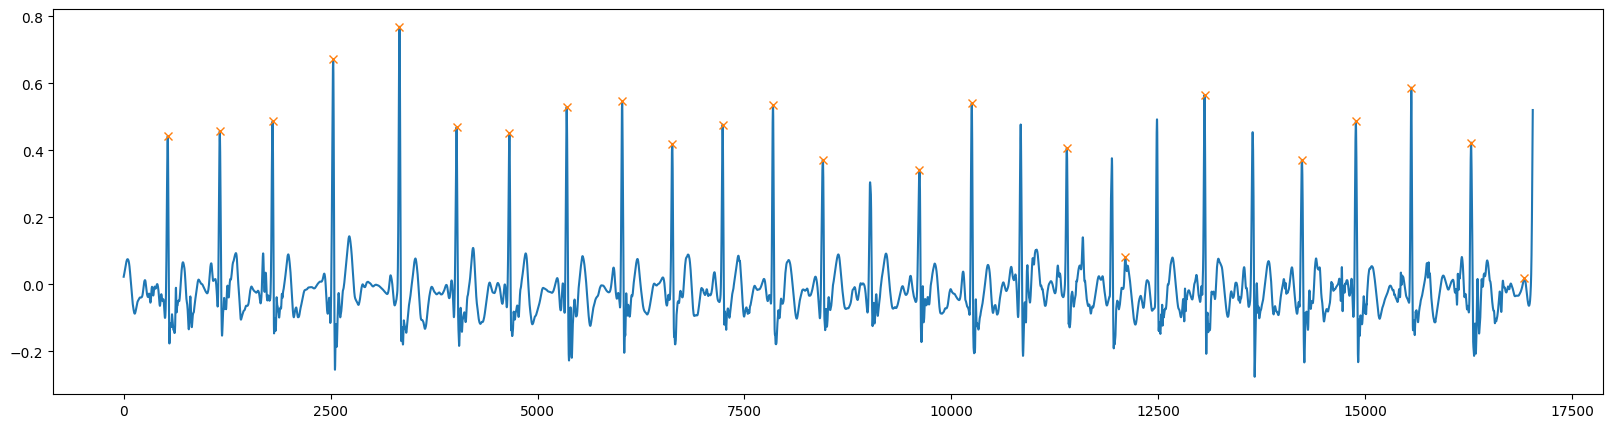

In [ ]:
def calculate_rmssd(dif_reposo):
    rr_diff = np.diff(dif_reposo)
    squared_diff = np.square(rr_diff)
    mean_squared_diff = np.mean(squared_diff)
    rmssd = np.sqrt(mean_squared_diff)
    return rmssd


#SENAL EN REPOSO
peaks_reposo, _ = signal.find_peaks(ecg_reposo_filtrado, distance=600)
dif_reposo=np.diff(peaks_reposo)
rmssd_reposo=calculate_rmssd(dif_reposo)
print(rmssd_reposo)
plt.figure(figsize=(20,5))
plt.plot(ecg_reposo_filtrado)
plt.plot(peaks_reposo, ecg_reposo_filtrado[peaks_reposo], "x")
#Compute BPM
rr_dif_reposo = dif_reposo/1000

numerator=np.ones(len(dif_reposo))
numerator=numerator*60;

BPM_reposo=numerator/rr_dif_reposo
print(BPM_reposo)
rmssd_reposo=calculate_rmssd(dif_reposo)

#SENAL EN INSPIRACIONES
peaks_inspiraciones, _ = signal.find_peaks(ecg_inspiraciones_filtrado, distance=600)
dif_inspiraciones=np.diff(peaks_inspiraciones)
rmssd_inspiraciones=calculate_rmssd(dif_inspiraciones)
print(rmssd_inspiraciones)
plt.figure(figsize=(20,5))
plt.plot(ecg_inspiraciones_filtrado)
plt.plot(peaks_inspiraciones, ecg_inspiraciones_filtrado[peaks_inspiraciones], "x")
#Compute BPM
rr_dif_inspiraciones = dif_inspiraciones/1000

numerator=np.ones(len(dif_inspiraciones))
numerator=numerator*60;

BPM_inspiraciones=numerator/rr_dif_inspiraciones
print(BPM_inspiraciones)
rmssd_valsalva2=calculate_rmssd(dif_inspiraciones)

#SENAL ACOSTADO PIE
peaks_acostado_pie, _ = signal.find_peaks(ecg_acostado_pie_filtrado, distance=600)
dif_acostado_pie=np.diff(peaks_inspiraciones)
rmssd_acostado_pie=calculate_rmssd(dif_acostado_pie)
print(rmssd_acostado_pie)
plt.figure(figsize=(20,5))
plt.plot(ecg_acostado_pie_filtrado)
plt.plot(peaks_acostado_pie, ecg_acostado_pie_filtrado[peaks_acostado_pie], "x")
#Compute BPM
rr_dif_acostado_pie = dif_acostado_pie/1000

numerator=np.ones(len(dif_acostado_pie))
numerator=numerator*60;

BPM_acostado_pie=numerator/rr_dif_acostado_pie
print(BPM_acostado_pie)
rmssd_acostado_pie=calculate_rmssd(dif_acostado_pie)

#SENAL VALSALVA

#---PRIMERA PARTE VALSALVA
#detected_peaks = bsnb.detect_r_peaks(ecg_valsalva_ventana1_filtrado, 1000, time_units=True, plot_result=True)
#dictParameters = bsnb.hrv_parameters(valores_valsalva, 1000, signal=True)
peaks_valsalva1, _ = signal.find_peaks(ecg_valsalva_ventana1_filtrado, distance=600)
dif_valsalva1=np.diff(peaks_valsalva1)

#Calculate BPM vector
#Compute diference in seconds
rr_dif_valsalva1 = dif_valsalva1/1000

numerator=np.ones(len(dif_valsalva1))
numerator=numerator*60;

BPM_valsalva1=numerator/rr_dif_valsalva1
print(BPM_valsalva1)
rmssd_valsalva1=calculate_rmssd(dif_valsalva1)
print(rmssd_valsalva1)

#---SEGUNDA PARTE VALSALVA
peaks_valsalva2, _ = signal.find_peaks(ecg_valsalva_ventana2_filtrado, distance=600)
dif_valsalva2=np.diff(peaks_valsalva2)
rmssd_valsalva2=calculate_rmssd(dif_valsalva2)
print(rmssd_valsalva2)
plt.figure(figsize=(20,5))
plt.plot(ecg_valsalva_ventana2_filtrado)
plt.plot(peaks_valsalva2, ecg_valsalva_ventana2_filtrado[peaks_valsalva2], "x")
#Compute BPM
rr_dif_valsalva2 = dif_valsalva2/1000

numerator=np.ones(len(dif_valsalva2))
numerator=numerator*60;

BPM_valsalva2=numerator/rr_dif_valsalva2
print(BPM_valsalva2)
rmssd_valsalva2=calculate_rmssd(dif_valsalva2)


#EXTRACCION DE DATOS ESTADISTICOS

In [ ]:
#AQUI CALCULAREMOS VARIOS PARAMETROS ESTADISTICOS DE LA SEÑAL

#SEÑAL EN REPOSO

media = np.mean(ecg_reposo_filtrado)
mediana = np.median(ecg_reposo_filtrado)
desviacion_estandar = np.std(ecg_reposo_filtrado)
minimo = np.min(ecg_reposo_filtrado)
maximo = np.max(ecg_reposo_filtrado)
rango = np.ptp(ecg_reposo_filtrado)
percentil_25 = np.percentile(ecg_reposo_filtrado, 25)
percentil_75 = np.percentile(ecg_reposo_filtrado, 75)

# Mostrar los resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print(f"Rango: {rango}")
print(f"Percentil 25: {percentil_25}")
print(f"Percentil 75: {percentil_75}")



Media: -0.012447574956402807
Mediana: -0.013696470157774485
Desviación estándar: 0.0627317093241181
Mínimo: -0.19418826368786088
Máximo: 0.38885204037080284
Rango: 0.5830403040586637
Percentil 25: -0.04987989773815193
Percentil 75: 0.007541472546101496


In [ ]:
#SEÑAL EN INSPIRACIONES
media = np.mean(ecg_inspiraciones_filtrado)
mediana = np.median(ecg_inspiraciones_filtrado)
desviacion_estandar = np.std(ecg_inspiraciones_filtrado)
minimo = np.min(ecg_inspiraciones_filtrado)
maximo = np.max(ecg_inspiraciones_filtrado)
rango = np.ptp(ecg_inspiraciones_filtrado)
percentil_25 = np.percentile(ecg_inspiraciones_filtrado, 25)
percentil_75 = np.percentile(ecg_inspiraciones_filtrado, 75)

# Mostrar los resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print(f"Rango: {rango}")
print(f"Percentil 25: {percentil_25}")
print(f"Percentil 75: {percentil_75}")

Media: -0.011236032141617723
Mediana: -0.014184593152715847
Desviación estándar: 0.054034627759203945
Mínimo: -0.24587069216165075
Máximo: 0.5102898532175878
Rango: 0.7561605453792386
Percentil 25: -0.037828276646860906
Percentil 75: 0.00499753264120573


In [ ]:
#SEÑAL ACOSTADO PIE
media = np.mean(ecg_acostado_pie_filtrado)
mediana = np.median(ecg_acostado_pie_filtrado)
desviacion_estandar = np.std(ecg_acostado_pie_filtrado)
minimo = np.min(ecg_acostado_pie_filtrado)
maximo = np.max(ecg_acostado_pie_filtrado)
rango = np.ptp(ecg_acostado_pie_filtrado)
percentil_25 = np.percentile(ecg_acostado_pie_filtrado, 25)
percentil_75 = np.percentile(ecg_acostado_pie_filtrado, 75)

# Mostrar los resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print(f"Rango: {rango}")
print(f"Percentil 25: {percentil_25}")
print(f"Percentil 75: {percentil_75}")

Media: -0.00865341273920662
Mediana: -0.015233224978383284
Desviación estándar: 0.06383792103164258
Mínimo: -0.17795746594015238
Máximo: 0.3553694692351765
Rango: 0.5333269351753289
Percentil 25: -0.044018006628325064
Percentil 75: 0.010787831543925068


In [ ]:
#SEÑAL VALSALVA 1
media = np.mean(ecg_valsalva_ventana1_filtrado)
mediana = np.median(ecg_valsalva_ventana1_filtrado)
desviacion_estandar = np.std(ecg_valsalva_ventana1_filtrado)
minimo = np.min(ecg_valsalva_ventana1_filtrado)
maximo = np.max(ecg_valsalva_ventana1_filtrado)
rango = np.ptp(ecg_valsalva_ventana1_filtrado)
percentil_25 = np.percentile(ecg_valsalva_ventana1_filtrado, 25)
percentil_75 = np.percentile(ecg_valsalva_ventana1_filtrado, 75)

# Mostrar los resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print(f"Rango: {rango}")
print(f"Percentil 25: {percentil_25}")
print(f"Percentil 75: {percentil_75}")

Media: -0.011705195832082684
Mediana: -0.015987203226995192
Desviación estándar: 0.09639050827492619
Mínimo: -0.3596316994252524
Máximo: 0.6179712917073661
Rango: 0.9776029911326185
Percentil 25: -0.060585970467509104
Percentil 75: 0.010263898468737685


In [ ]:
#SEÑAL VALSALVA 2
media = np.mean(ecg_valsalva_ventana2_filtrado)
mediana = np.median(ecg_valsalva_ventana2_filtrado)
desviacion_estandar = np.std(ecg_valsalva_ventana2_filtrado)
minimo = np.min(ecg_valsalva_ventana2_filtrado)
maximo = np.max(ecg_valsalva_ventana2_filtrado)
rango = np.ptp(ecg_valsalva_ventana2_filtrado)
percentil_25 = np.percentile(ecg_valsalva_ventana2_filtrado, 25)
percentil_75 = np.percentile(ecg_valsalva_ventana2_filtrado, 75)

# Mostrar los resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print(f"Rango: {rango}")
print(f"Percentil 25: {percentil_25}")
print(f"Percentil 75: {percentil_75}")

Media: -0.013304656354383628
Mediana: -0.023669010392281746
Desviación estándar: 0.09600308652288671
Mínimo: -0.27585521561346843
Máximo: 0.7690791853020186
Rango: 1.044934400915487
Percentil 25: -0.063717619187583
Percentil 75: 0.009170564213558103


#EXPORTAR DATA

In [ ]:
#EXPORTING DATA TO CSV
#BPM
#DATA REPOSO
data={'BPM':BPM_reposo,'RR':dif_reposo}
df=pd.DataFrame(data)
df.to_csv('REPOSO_S3.csv',index=False)

#DATA INSPIRACIONES
data={'BPM':BPM_inspiraciones,'RR':dif_inspiraciones}
df=pd.DataFrame(data)
df.to_csv('INSPIRACIONES_S3.csv',index=False)
#DATA ACOSTADO PIE
data={'BPM':BPM_acostado_pie,'RR':dif_acostado_pie}
df=pd.DataFrame(data)
df.to_csv('ACOSTADO_PIE_S3.csv',index=False)
#DATA VALSALVA 1
data={'BPM':BPM_valsalva1,'RR':dif_valsalva1}
df=pd.DataFrame(data)
df.to_csv('VALSALVA1_S3.csv',index=False)
#DATA VALSALVA 2
data={'BPM':BPM_valsalva2,'RR':dif_valsalva2}
df=pd.DataFrame(data)
df.to_csv('VALSALVA2_S3.csv',index=False)


print(rmssd_reposo)
print(rmssd_inspiraciones)
print(rmssd_acostado_pie)
print(rmssd_valsalva1)
print(rmssd_valsalva2)

22.229249534874562
202.59789479840154
202.59789479840154
22.366512235152296
266.9733355688577
